##### Dataset Information

All information related to this dataset can be found here.

Repository: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/)

[Dataset](https://archive.ics.uci.edu/dataset/10/automobile)


[LinkedIn](https://archive.ics.uci.edu/)

###### This notebook provide a simple and straight-forward way on how to start exploring a dataset.

###### The model used here is not for other purposes other than learning.

###### The selection of best model for this particular dataset has not been performed to greater extent, however the dataset after cleaning has been used to fit the Linear Regression Model.

###### Evalution of model has not be performed to greater extent. 

#### Let me know if any issue arises with the codes used [here](https://www.linkedin.com/in/nabin-ghimire-69a76124b/).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn


In [4]:
# Dataset Information

variables_to_take = ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'price']


In [5]:

df = pd.read_csv("/home/nabin/used-auto.csv", header = None)

headers = ["RN", "symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

del(df["RN"]) 

df

df.replace("?", np.nan, inplace=True)
missing_counts = df.isnull().describe()
missing_counts = pd.DataFrame(df["symboling"].count()-missing_counts.loc["freq"])
missing_counts.rename(columns={"freq": "number of missing values"}, inplace=True)
missing_counts

numeric = ["symboling", "normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke", "compression-ratio",\
           "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

non_numeric = []
for qualitative in [i for i in df.columns]:
    
    if qualitative not in [i for i in numeric]:
        non_numeric.append(qualitative)

non_numeric

numeric = df[numeric].astype(dtype=float)
df = pd.concat([df[non_numeric], numeric], axis=1)

df.drop(columns=["symboling"], inplace=True)


df.dropna(subset=["price"], inplace=True)
df


df.dropna(subset=["num-of-doors"], inplace=True)
df.reset_index(drop=True, inplace=True)
df

missing = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]
bore = df["bore"].isnull().to_dict()
stroke = df["stroke"].notnull().to_dict()
horsepower = df["horsepower"].isnull().to_dict()
peak_rpm = df["peak-rpm"].notnull().to_dict()

bore_ = [key  for key, value in bore.items() if value == True]
stroke_ = [key  for key, value in stroke.items() if value == False]
horsepower_ = [key for key, value in horsepower.items() if value == True]
peak_rpm_ = [key  for key, value in peak_rpm.items() if value == False]

bore_missing = pd.DataFrame({"missing_bore_index_": bore_})
stroke_missing = pd.DataFrame({"missing_stroke_index_": stroke_})
horsepower_missing = pd.DataFrame({"missing_horsepower_index_": horsepower_})
peak_rpm_missing = pd.DataFrame({"missing_peak_rpm_index_": peak_rpm_})

missing_values = pd.concat([bore_missing, stroke_missing, horsepower_missing, peak_rpm_missing], axis=1)
missing_values

rows_missing = df.drop(range(0, 51)).drop(range(55, 124)).drop(range(126, 199))
rows_missing

a = df[[i for i in non_numeric] + ["bore"]].groupby(by=[i for i in non_numeric]).mean()
a

df.replace({"normalized-losses": np.nan}, df["normalized-losses"].mean(), inplace=True),
df.replace({"bore": np.nan}, df["bore"].mean(), inplace=True)
df.replace({"stroke": np.nan}, df["stroke"].mean(), inplace=True)
df.replace({"horsepower": np.nan}, df["horsepower"].mean(), inplace=True)
df.replace({"peak-rpm": np.nan}, df["peak-rpm"].mean(), inplace=True)

rows_with_missing_values = df.drop(range(0, 51)).drop(range(55, 124)).drop(range(126, 199))
rows_with_missing_values

def check():
    warn = """Caution! There may be some "missing"!!"""
    a = pd.DataFrame(df.notnull().count(axis=0))
    if a[0].unique() != df["make"].count():
        return True
    else:
        return warn
                
check()        

stat = df.describe()
stat

correlation_matrix = df[stat.columns].corr()
variable_in_between_correlation = pd.DataFrame(correlation_matrix.loc["price"]).transpose()
variable_in_between_correlation

my_dict = correlation_matrix.loc["price"].to_dict()
selected_features = [key  for key, value in my_dict.items() if value >=0.5 or value <=-0.5]

def my_function(i):
    result = scipy.stats.pearsonr(df[correlation_matrix.columns[i]], df["price"])
    return result

cor = [my_function(i) for i in range(0, len(correlation_matrix), 1)]
cor = pd.DataFrame(cor)
cor
cor = pd.DataFrame(cor.values.round(decimals=5))
cor.set_index(correlation_matrix.index, inplace=True)
headers =["pearson_corr_coef", "p-value"]
cor.columns = headers

my_dict1 = cor.loc[:, "p-value"].to_dict()
selected_features1 = [key  for key, value in my_dict1.items() if value <= 0.05]

"The selected input variables are: "
print(selected_features1)

print("Total number of input variables: ", len(selected_features1))



['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'price']
Total number of input variables:  10


equation analysis of "price" with other variables:
             pearson_corr_coef  p-value   slope  intercept  R_squared
wheel-base             0.58384      0.0   4.905     -0.286      0.341
length                 0.69121      0.0   5.060     -0.297      0.478
width                  0.75163      0.0  12.149     -0.800      0.565
curb-weight            0.83406      0.0   2.165     -0.090      0.696
engine-size            0.87215      0.0   1.444     -0.036      0.761
bore                   0.54256      0.0   3.488     -0.186      0.294
horsepower             0.81108      0.0   1.232     -0.021      0.658
city-mpg              -0.69026      0.0  -1.442      0.160      0.476
highway-mpg           -0.70814      0.0  -1.687      0.178      0.501
price                  1.00000      0.0   1.000      0.000      1.000


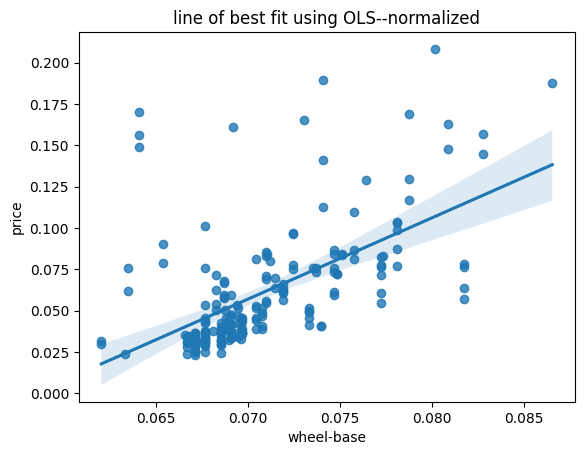

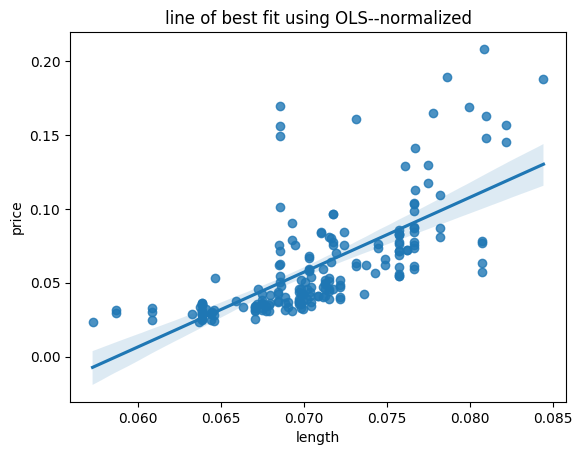

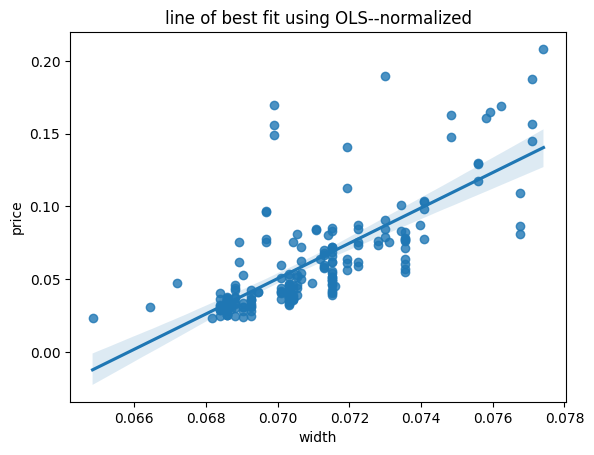

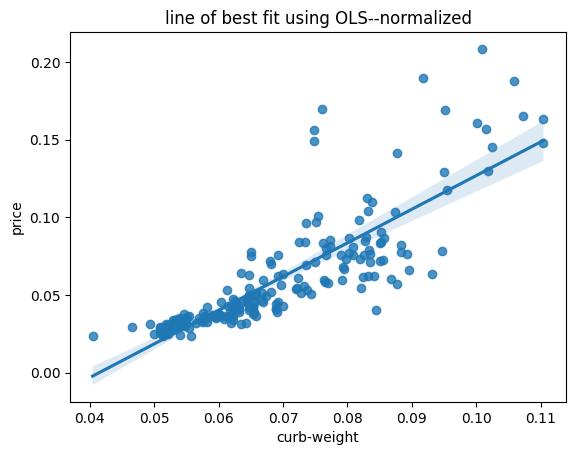

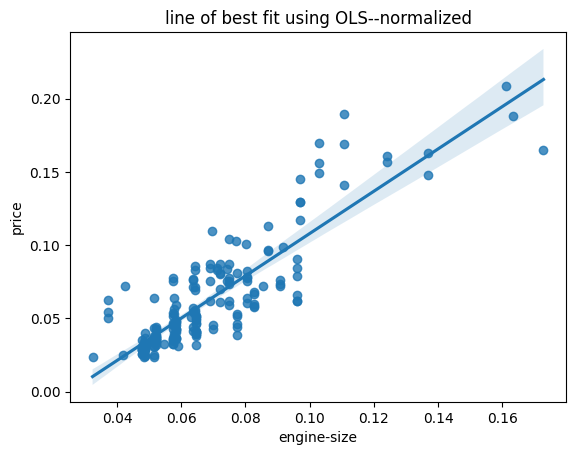

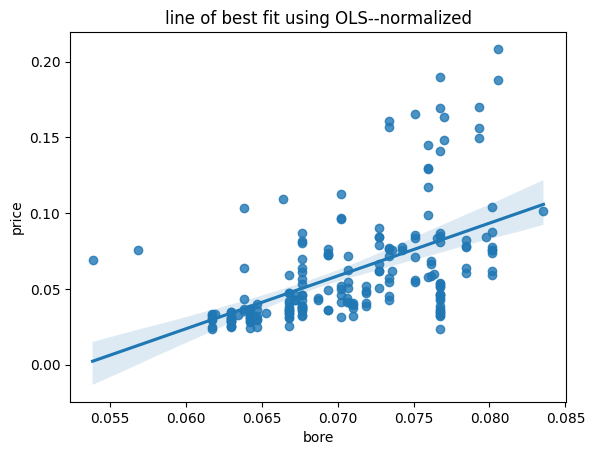

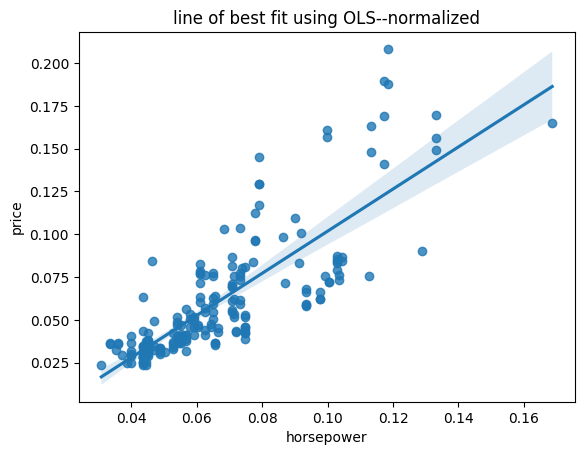

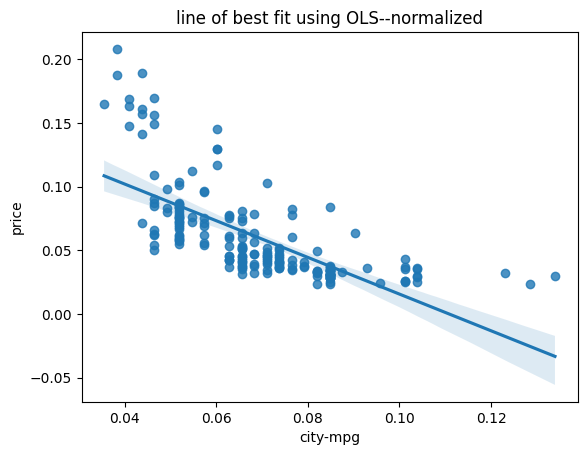

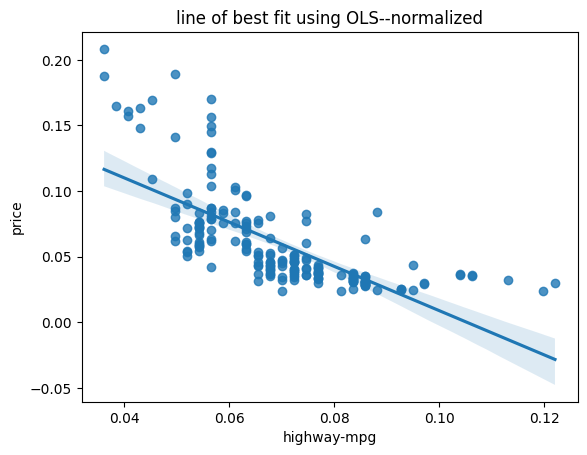

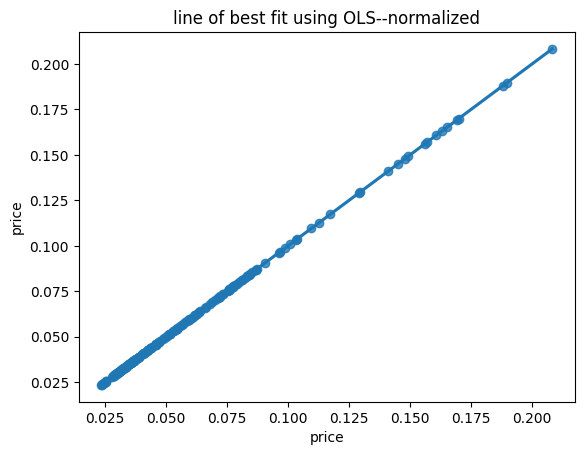

<Figure size 640x480 with 0 Axes>

In [6]:
import sklearn
from sklearn.linear_model import LinearRegression

import sklearn.preprocessing

features = df[selected_features1]

arr = sklearn.preprocessing.normalize(features, axis=0)

features_norm = features_norm = pd.DataFrame(arr)
features_norm.columns = features.columns

lm = LinearRegression()

def equation_line(i):
    X = arr[:, i].reshape(-1, 1)
    y = arr[:, 9].reshape(-1, 1)
    reg = lm.fit(X, y)
    return [lm.coef_[0, 0], lm.intercept_[0], lm.score(X, y)]

output = [equation_line(i) for i in range(0, 10, 1)]
output = pd.DataFrame(output).round(decimals=3)
output.columns = ["slope", "intercept", "R_squared"]
output.set_index(features.columns, drop=True, inplace=True)
print("""equation analysis of "price" with other variables:""") 


def visual_inspection(i):
    result = sns.regplot(x = features_norm[features_norm.columns[i]], y = features_norm["price"])
    plt.title("line of best fit using OLS--normalized")
    plt.figure()
    return result

[visual_inspection(i) for i in range(0, len(features.columns), 1)]
output = pd.concat([cor, output], axis=1).dropna()
print(output)


In [7]:
data = df[selected_features1]
print(data.head())
print(data.tail())



# let's take a look at the data for input
X = data.drop(columns=["price"])
y = data["price"]

   wheel-base  length  width  curb-weight  engine-size  bore  horsepower  \
0        88.6   168.8   64.1       2548.0        130.0  3.47       111.0   
1        88.6   168.8   64.1       2548.0        130.0  3.47       111.0   
2        94.5   171.2   65.5       2823.0        152.0  2.68       154.0   
3        99.8   176.6   66.2       2337.0        109.0  3.19       102.0   
4        99.4   176.6   66.4       2824.0        136.0  3.19       115.0   

   city-mpg  highway-mpg    price  
0      21.0         27.0  13495.0  
1      21.0         27.0  16500.0  
2      19.0         26.0  16500.0  
3      24.0         30.0  13950.0  
4      18.0         22.0  17450.0  
     wheel-base  length  width  curb-weight  engine-size  bore  horsepower  \
194       109.1   188.8   68.9       2952.0        141.0  3.78       114.0   
195       109.1   188.8   68.8       3049.0        141.0  3.78       160.0   
196       109.1   188.8   68.9       3012.0        173.0  3.58       134.0   
197       109.1

R_squared_train 0.8480639565871303
R_squared_test 0.7704216545906184


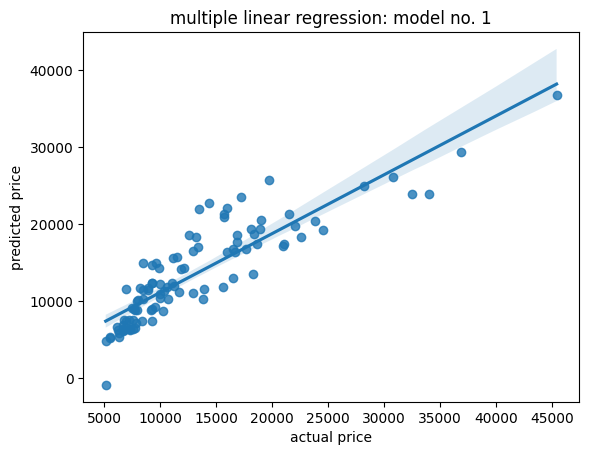

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn import model_selection
test_size = 0.5
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 1-test_size, random_state = 50)

# we shall use the z-score transformed data for this purpose
input = ((("scale", StandardScaler()), ("poly_feature", PolynomialFeatures(degree=1)), ("model", LinearRegression())))
pipe = Pipeline(input)

pipe.fit(X_train, y_train)

yhat = pipe.predict(X_test)

sns.regplot(x=y_test, y=yhat)
plt.title("multiple linear regression: model no. 1")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.figure()

print("R_squared_train", pipe.score(X_train, y_train))
print("R_squared_test", pipe.score(X_test, y_test))


In [9]:
check()

'Caution! There may be some "missing"!!'